In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
from data.utils import make_poisson_pmf, update_poisson, make_mixture

In [3]:
lam = 1.4
dist = ss.poisson(lam)
k = 4
dist.pmf(k), 1 - dist.cdf(k-1)

(0.039471954028253146, 0.053725250368075406)

<AxesSubplot:>

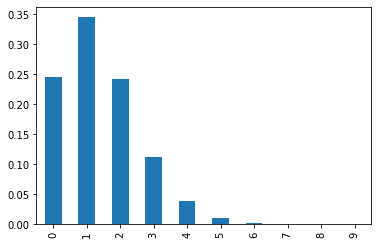

In [4]:
lam = 1.4
goals = np.arange(10)
pmf_goals = make_poisson_pmf(lam, goals)
pmf_goals.plot.bar()

<AxesSubplot:>

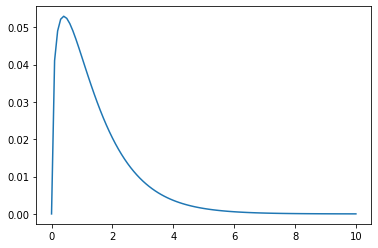

In [5]:
# 감마분포는 alpha번째 사건이 발생할 때까지 대기시간의 분포
alpha, beta = 1.4, 1
qs = np.linspace(0, 10, 101)
ps = ss.gamma(alpha, scale=beta).pdf(qs)
prior = Pmf(ps, qs)
prior.normalize()
prior.plot()

In [6]:
lams = prior.qs
k = 4
likelihood = ss.poisson(lams).pmf(k)

<AxesSubplot:>

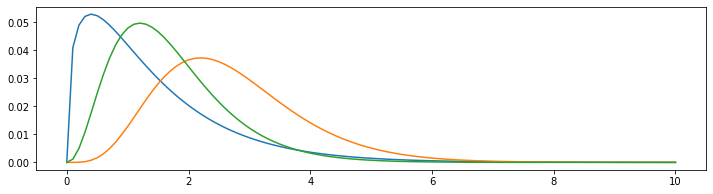

In [7]:
france = prior.copy()
france = update_poisson(france, 4)
croatia = prior.copy()
croatia = update_poisson(croatia, 2)
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
prior.plot(ax=ax)
france.plot(ax=ax)
croatia.plot(ax=ax)

In [8]:
croatia.mean(), france.mean()

(1.6999765866755225, 2.699772393342308)

In [9]:
Pmf.prob_gt(france, croatia)

0.7499366290930174

In [11]:
# goals = np.arange(10)
pmf_seq = [make_poisson_pmf(lam, goals) for lam in prior.qs]
len(pmf_seq)

101

In [12]:
pred_france = make_mixture(france, pmf_seq)
pred_croatia = make_mixture(croatia, pmf_seq)

In [13]:
win = Pmf.prob_gt(pred_france, pred_croatia)
draw = Pmf.prob_eq(pred_france, pred_croatia)
lose = Pmf.prob_lt(pred_france, pred_croatia)
win, draw, lose

(0.5703522415934519, 0.16521399583418947, 0.26443376257235873)